We will be using the starter dataset on kaggle available (https://www.kaggle.com/c/titanic/data)


In [59]:
#Importing the basic libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [60]:
### Importing data 
df = pd.read_csv('../data/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
# from the basic analysis we can see that name, and ticket might not be useful, 
# so we remove them from the dataframe
removed_cols = ['Name', 'Ticket', 'Cabin']
temp_cols = ['PassengerId', 'Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[temp_cols]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [62]:
# the next step would be finding any missing data

# we first check the shape of our df
print('Shape of the dataset - ', df.shape)

print('Missing values \n',df.isnull().sum())
# We can see that around 177 rows have missing age value, the number of rows are significant we 
# cannot remove them so we find the mean and assign it to the age - This is a bad idea and will be rectified
# in the further stages
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked']
# a better approach for filling na would be to create another model which can predict the age based on 
# other parameters

# Removing the embarked which have value NA
df.dropna(inplace=True)

Shape of the dataset -  (891, 9)
Missing values 
 PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [63]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
# convert categorical to integers
categories_changer = {'Sex' : {'male':1, 'female': 2}, 'Embarked' : {'S':1, 'C':2, 'Q': 3}}
df.replace(categories_changer, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,2,38.0,1,0,71.2833,2
2,3,1,3,2,26.0,0,0,7.9250,1
3,4,1,1,2,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


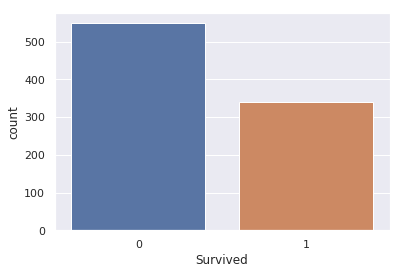